1.download the Butterfly Image Classification dataset,visualized data using Python Graph Gallery

In [2]:
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd 
from tensorflow.keras.preprocessing.image import load_img, img_to_array
# Ignore warning messages
warnings.filterwarnings("ignore")

train_csv="/kaggle/input/butterfly-image-classification/Training_set.csv"
test_csv="/kaggle/input/butterfly-image-classification/Testing_set.csv"
train_folder="/kaggle/input/butterfly-image-classification/train"
test_folder="/kaggle/input/butterfly-image-classification/test"

butterfly_train_df = pd.read_csv(train_csv)
butterfly_test_df = pd.read_csv(test_csv)

# add full path to the dataframe
butterfly_train_df['path'] = str(train_folder)+'/' + butterfly_train_df['filename']
butterfly_test_df['path'] = str(test_folder)+'/' + butterfly_test_df['filename']

butterfly_train_df.head(10)

,filename,label,path
0,Image_1.jpg,SOUTHERN DOGFACE,/kaggle/input/butterfly-image-classification/t...
1,Image_2.jpg,ADONIS,/kaggle/input/butterfly-image-classification/t...
2,Image_3.jpg,BROWN SIPROETA,/kaggle/input/butterfly-image-classification/t...
3,Image_4.jpg,MONARCH,/kaggle/input/butterfly-image-classification/t...
4,Image_5.jpg,GREEN CELLED CATTLEHEART,/kaggle/input/butterfly-image-classification/t...
5,Image_6.jpg,CAIRNS BIRDWING,/kaggle/input/butterfly-image-classification/t...
6,Image_7.jpg,GREEN CELLED CATTLEHEART,/kaggle/input/butterfly-image-classification/t...
7,Image_8.jpg,EASTERN DAPPLE WHITE,/kaggle/input/butterfly-image-classification/t...
8,Image_9.jpg,BROWN SIPROETA,/kaggle/input/butterfly-image-classification/t...
9,Image_10.jpg,RED POSTMAN,/kaggle/input/butterfly-image-classification/t...


In [3]:
butterfly_test_df.head(10)

,filename,path
0,Image_1.jpg,/kaggle/input/butterfly-image-classification/t...
1,Image_2.jpg,/kaggle/input/butterfly-image-classification/t...
2,Image_3.jpg,/kaggle/input/butterfly-image-classification/t...
3,Image_4.jpg,/kaggle/input/butterfly-image-classification/t...
4,Image_5.jpg,/kaggle/input/butterfly-image-classification/t...
5,Image_6.jpg,/kaggle/input/butterfly-image-classification/t...
6,Image_7.jpg,/kaggle/input/butterfly-image-classification/t...
7,Image_8.jpg,/kaggle/input/butterfly-image-classification/t...
8,Image_9.jpg,/kaggle/input/butterfly-image-classification/t...
9,Image_10.jpg,/kaggle/input/butterfly-image-classification/t...


In [4]:
def shape_of_ds(df, ds_name='df'):
    print(f"{ds_name} dataset has {df.shape[0]} rows and {df.shape[1]} columns")
    
shape_of_ds(butterfly_train_df, "Train")
#shape_of_ds(butterfly_test_df, "Test")

Train dataset has 6499 rows and 3 columns


In [5]:
def check_null(df, ds_name='df'):
    print(f"Number of null values in the {ds_name} dataset: ")
    print(df.isnull().sum())

check_null(butterfly_train_df, "Train")
#print("*********************")
#check_null(butterfly_test_df, "Test")

Number of null values in the Train dataset: 
filename    0
label       0
path        0
dtype: int64


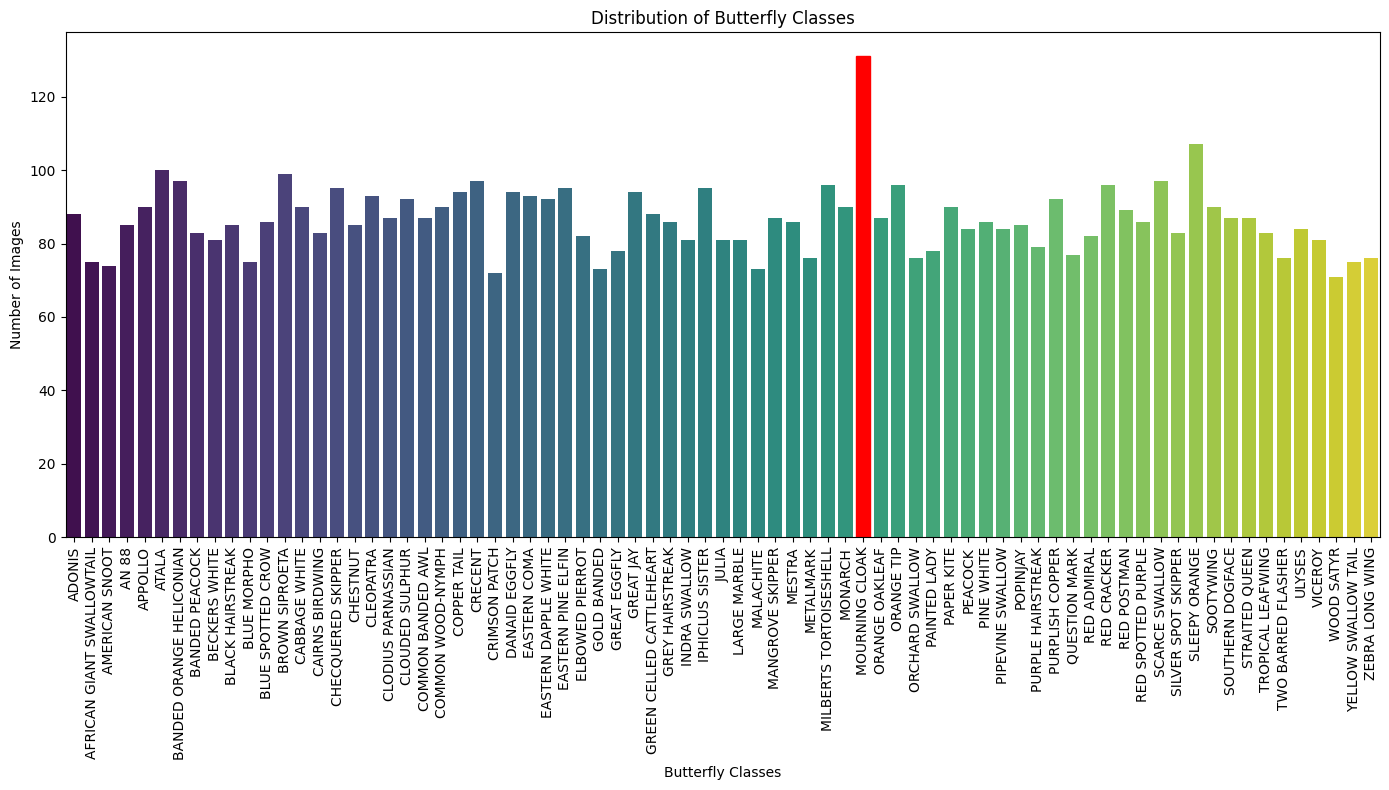

In [6]:
class_counts = butterfly_train_df['label'].value_counts().sort_index()
plt.figure(figsize=(14, 8))

# Create a bar plot
bars = sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')

# Highlight the bar with the maximum count
max_value_index = class_counts.idxmax()  
max_value = class_counts.max()  

for bar in bars.patches:
    if bar.get_x() + bar.get_width() / 2 == class_counts.index.get_loc(max_value_index):
        bar.set_color('red')  

plt.title('Distribution of Butterfly Classes')
plt.xlabel('Butterfly Classes')
plt.ylabel('Number of Images')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**EXplaination:There are 75 butterfly categories, of which MOURNING CLOAK is the largest category.**

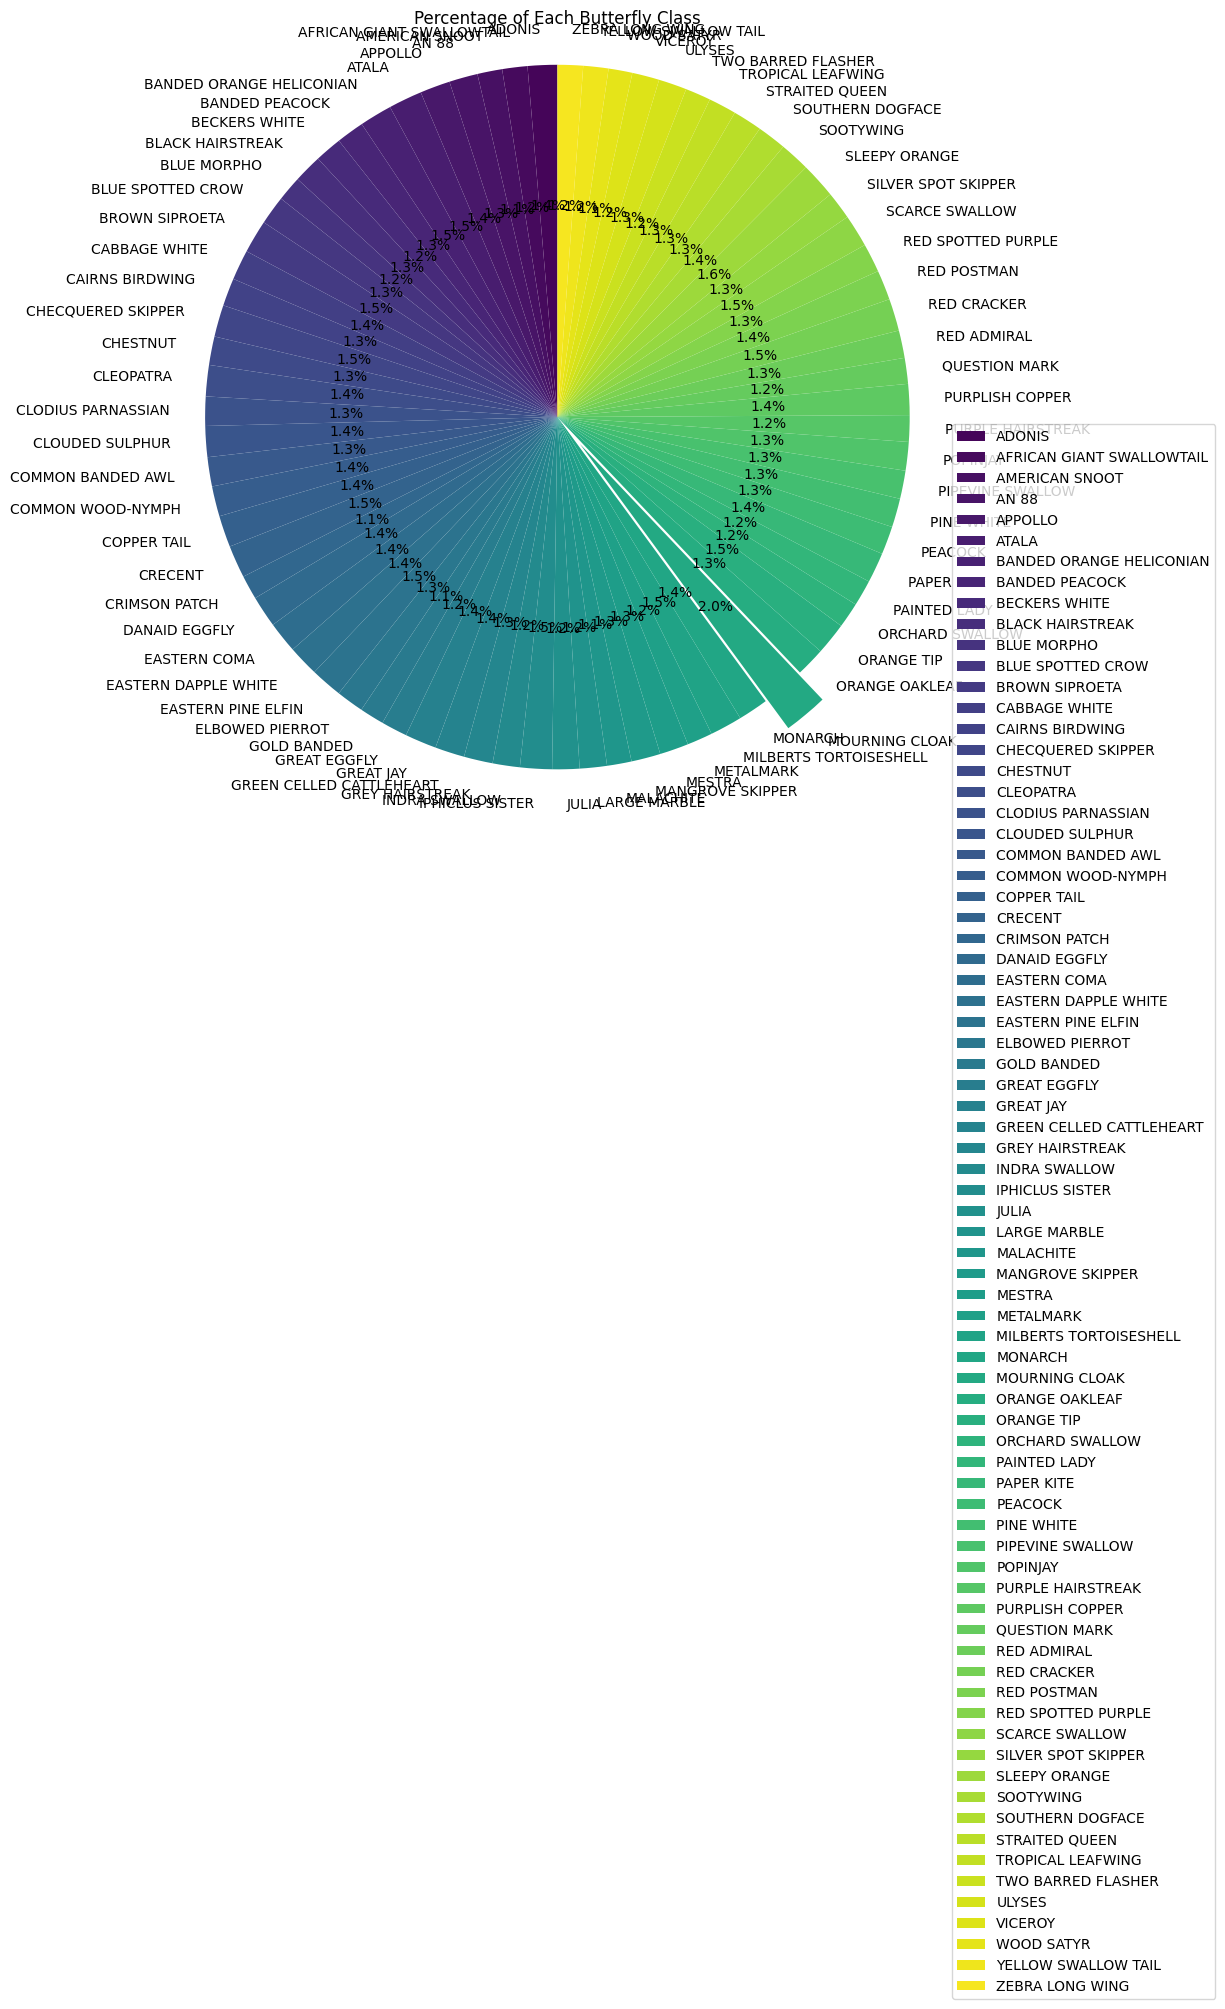

In [7]:
class_counts = butterfly_train_df['label'].value_counts().sort_index()
colors = sns.color_palette("viridis", len(class_counts))

# Find the index of the maximum value
max_index = class_counts.idxmax()
max_value = class_counts[max_index]

explode = [0.1 if label == max_index else 0 for label in class_counts.index]

plt.figure(figsize=(10, 10))
plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%', startangle=90, 
        colors=colors, explode=explode)
plt.title('Percentage of Each Butterfly Class')
plt.axis('equal') 
plt.legend(class_counts.index, loc="best", bbox_to_anchor=(1, 0.5))
plt.show()


**EXplaination:There are 75 butterfly categories, of which MOURNING CLOAK is the largest category.**

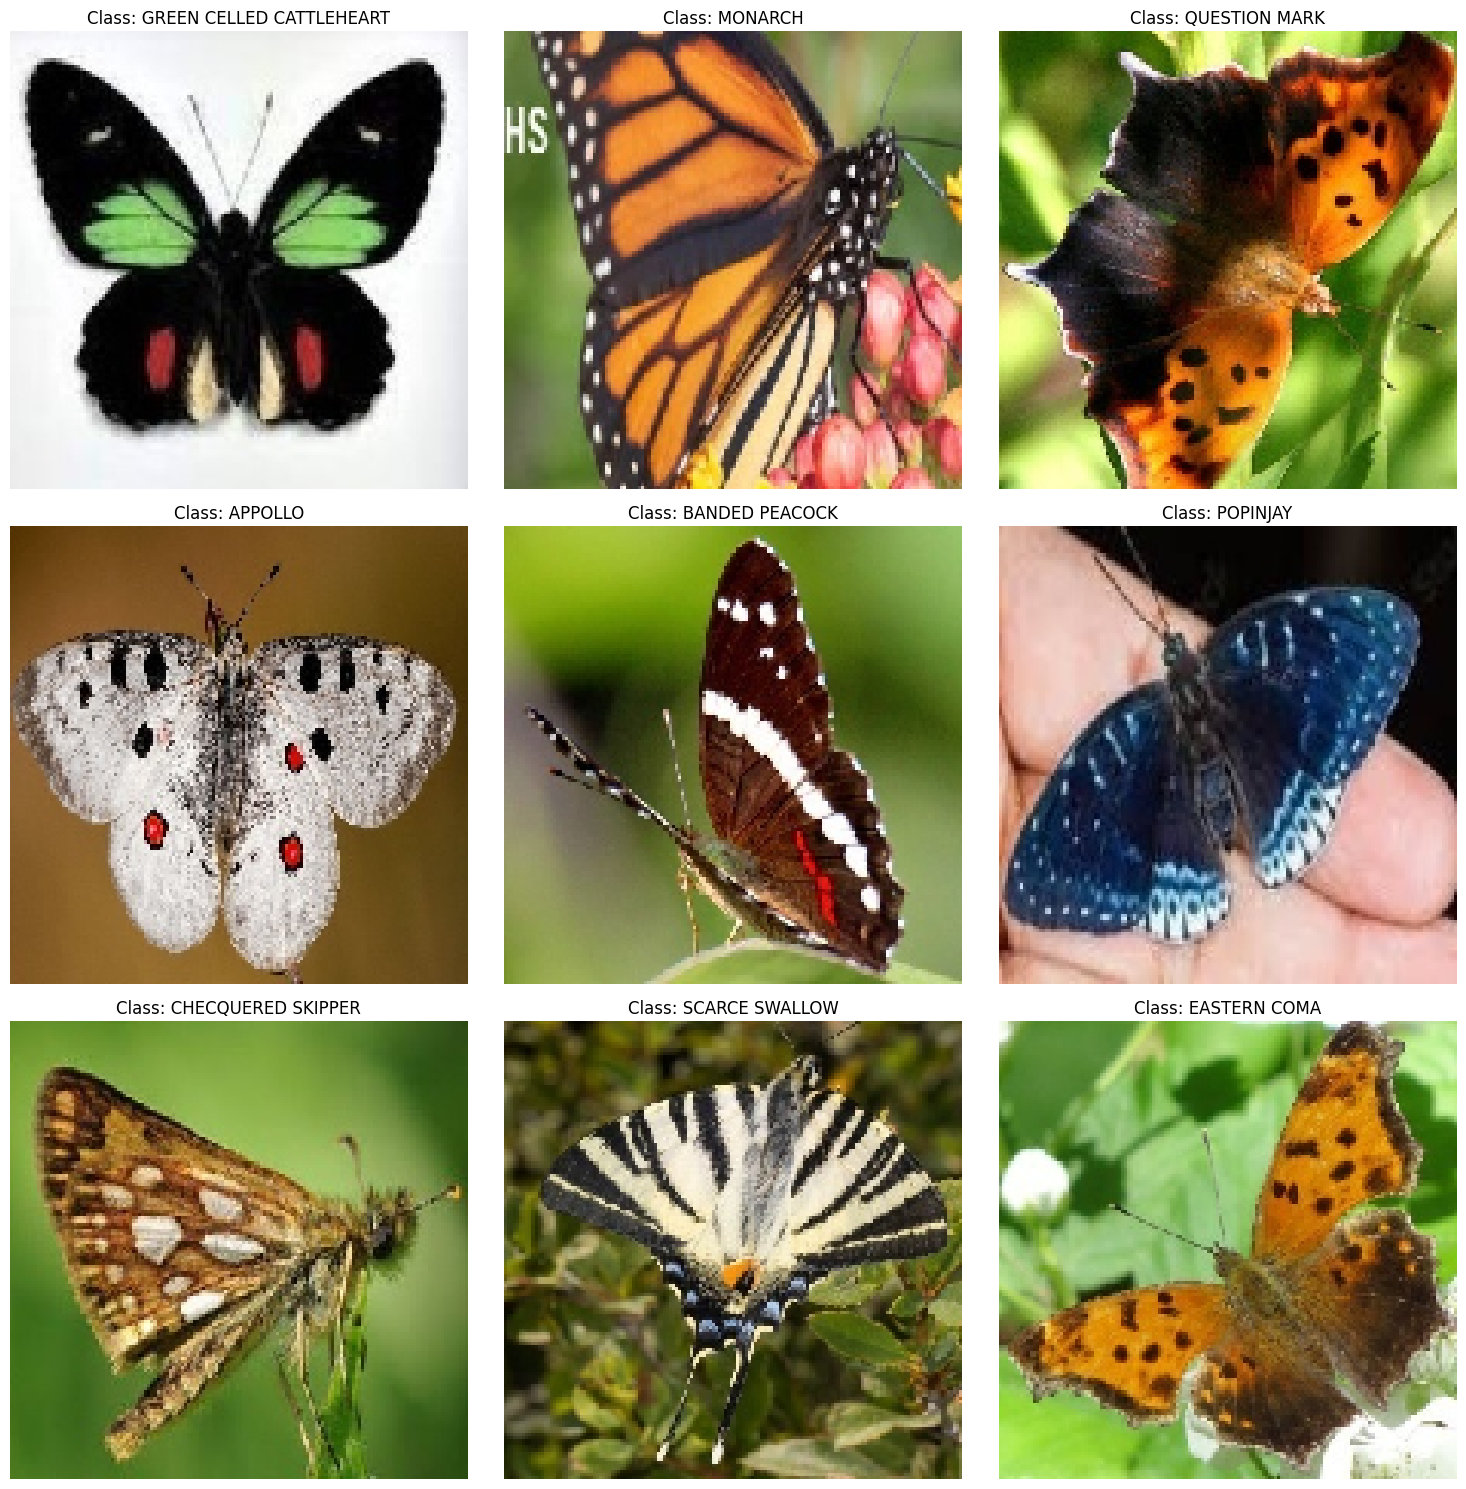

In [8]:
sample_images = butterfly_train_df.sample(9, random_state=42)
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i, (index, row) in enumerate(sample_images.iterrows()):
    img_path = row['path']
    img = load_img(img_path, target_size=(150, 150))
    img_array = img_to_array(img) / 255.0  
    
    ax = axes[i // 3, i % 3]
    ax.imshow(img_array)
    ax.set_title(f"Class: {row['label']}")
    ax.axis('off')

plt.tight_layout()
plt.show()

**Explaination:The code successfully displays 9 randomly selected butterfly images, which makes it easy to observe the characteristics and appearance of different categories. By displaying samples of different categories, we can preliminarily evaluate the diversity and coverage of the dataset, especially the intuitive understanding of category characteristics.**

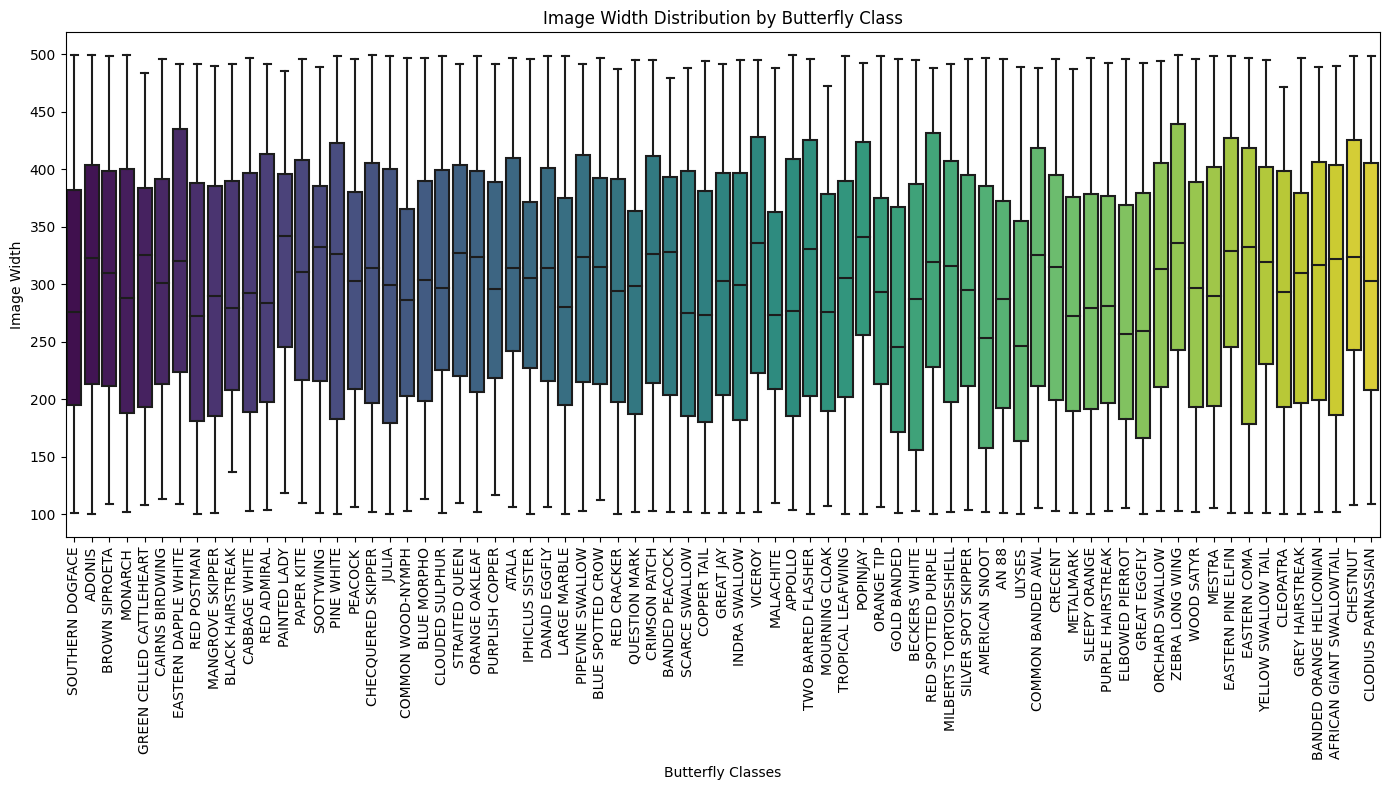

In [9]:
butterfly_train_df['image_width'] = np.random.randint(100, 500, size=len(butterfly_train_df))  
butterfly_train_df['image_height'] = np.random.randint(100, 500, size=len(butterfly_train_df))  

plt.figure(figsize=(14, 8))
sns.boxplot(data=butterfly_train_df, x='label', y='image_width', palette='viridis')
plt.title('Image Width Distribution by Butterfly Class')
plt.xlabel('Butterfly Classes')
plt.ylabel('Image Width')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Explaination:There are significant differences in image width for different butterfly categories. Some categories have a wide range of image widths, indicating that the images in these categories vary in size.**

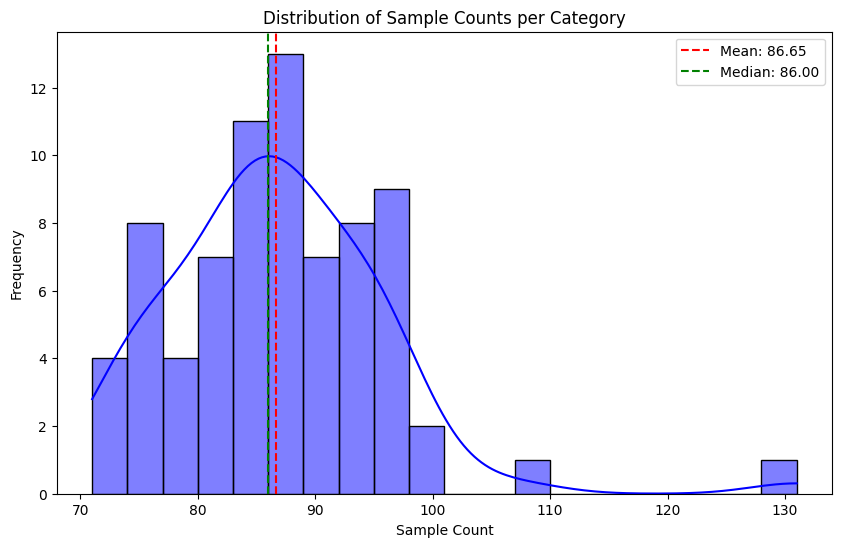

In [10]:
category_counts = butterfly_train_df['label'].value_counts().reset_index()
category_counts.columns = ['label', 'count']

mean_count = np.mean(category_counts['count'])
median_count = np.median(category_counts['count'])

plt.figure(figsize=(10, 6))
sns.histplot(category_counts['count'], bins=20, kde=True, color='blue')
plt.axvline(mean_count, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_count:.2f}')
plt.axvline(median_count, color='green', linestyle='--', linewidth=1.5, label=f'Median: {median_count:.2f}')

plt.title('Distribution of Sample Counts per Category')
plt.xlabel('Sample Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

**Explaination:The number of samples in most categories is relatively concentrated, showing the robustness of data distribution. However, the mean is higher than the median, indicating that there are some categories with a large number of samples, which may affect the balance of model training.**

2. Use the Pytorch platform to construct a deep learning (neural network) model. 

(a) Define a Data Loader class and a transformation pipeline to normalize the data. The transformation pipeline (including multiple processing stages) needs to be integrated in Data Loader. All preprocessing stages must be placed with suitable orders. 

In [11]:
from PIL import Image
import torch
from torchvision import transforms
from torchvision.io import read_image
from torch.utils.data import Dataset, DataLoader

class ButterflyDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform
        # Create a mapping from class names to indices
        self.class_mapping = {label: idx for idx, label in enumerate(set(dataframe['label']))}

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_path = self.dataframe.iloc[idx]['path']
        label = self.dataframe.iloc[idx]['label']
        image = Image.open(img_path).convert("RGB")
        label_index = self.class_mapping[label]
        
        if self.transform:
            image = self.transform(image)
        
        return image, label_index


# Define transformation pipeline
transform_pipeline = transforms.Compose([
    transforms.Resize((150, 150)), 
    transforms.ToTensor(),  
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  
])


(b) Prepare three sets of data: training, validation, and test to develop and evaluate the models.

In [12]:
from sklearn.model_selection import train_test_split

# train and validation and test
train_df, temp_df = train_test_split(butterfly_train_df, test_size=0.2, random_state=42)
# Split temp into validation
test_df, val_df = train_test_split(temp_df, test_size=0.5, random_state=42)


# prepare train dataset and train dataloader 
train_dataset = ButterflyDataset(train_df, transform=transform_pipeline)
train_dataloader = DataLoader(train_dataset, batch_size=42, shuffle=True)

# Iterate over the DataLoader and print the first batch
for batch_images, batch_labels in train_dataloader:
    print(batch_images.shape)  
    print(batch_labels)        
    break

# prepare val dataset and val dataloader 
val_dataset = ButterflyDataset(val_df, transform=transform_pipeline)
val_dataloader = DataLoader(val_dataset, batch_size=42, shuffle=False)

# Prepare DataLoader for test set
test_dataset = ButterflyDataset(test_df, transform=transform_pipeline)
test_dataloader = DataLoader(test_dataset, batch_size=42, shuffle=False)

print(f'Training samples: {len(train_dataset)}, Validation samples: {len(val_dataset)}, Test samples: {len(test_dataset)}')

num_classes = train_df['label'].nunique()
num_classes

torch.Size([42, 3, 150, 150])
tensor([22, 38,  4, 50, 18,  8, 47, 53, 45, 63, 66, 48,  3, 12, 68, 47, 73, 59,
        51, 63, 37, 69, 50, 62, 58, 13, 42,  7, 13, 59, 74, 58, 58, 72, 17, 71,
        12,  1, 64, 59, 57, 40])
Training samples: 5199, Validation samples: 650, Test samples: 650


75

(c) Design three deep learning models to construct classification models. You are advised to design simple and lightweight models to fasten the training process. Each model architecture must be described by a short paragraph. 

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
  
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)  
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)  
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)  
        self.fc1 = nn.Linear(64 * 37 * 37, 128)  
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  
        x = self.pool(F.relu(self.conv2(x)))  

        x = x.view(x.size(0), -1)  
        x = F.relu(self.fc1(x))  
        x = self.fc2(x)  
        return x
  


**CNN: Uses two convolutional layers, followed by max pooling, and two fully connected layers; Works well with images and automatically extracts features via convolutional filters.**

In [14]:
import torch.nn.functional as F

class SimpleDNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(SimpleDNN, self).__init__()
        
        self.fc1 = nn.Linear(input_size, 256)  
        self.fc2 = nn.Linear(256, 128)          
        self.fc3 = nn.Linear(128, num_classes)  
        
        self.dropout = nn.Dropout(0.5)  

    def forward(self, x):
        # Reshape to (batch_size, input_size)
        x = x.view(x.size(0), -1) 
        
        x = F.relu(self.fc1(x))    
        x = self.dropout(x)         
        x = F.relu(self.fc2(x))    
        x = self.fc3(x)             
        return x

**DNN: Three fully connected layers (with ReLU activations) and dropout for regularization. Best for flattened input features like vector data (e.g., processed image pixel values).**

In [15]:
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleRNN, self).__init__()
        
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)  
        self.fc = nn.Linear(hidden_size, num_classes)  
        
    def forward(self, x):
        h_0 = torch.zeros(1, x.size(0), hidden_size).to(x.device)  
        c_0 = torch.zeros(1, x.size(0), hidden_size).to(x.device)  
        
        out, (h_n, c_n) = self.lstm(x, (h_0, c_0))  
        
        out = self.fc(out[:, -1, :])  
        return out


**RNN:
Utilizes an LSTM layer to process sequences, and a final fully connected layer for output.
Although designed for sequence data, we treat flattened images as sequences in this case.**

(d) For each model design, you are required to train and optimize their corresponding models with three learning rates. Students decide ‘when to stop’ (stopping epoch) based the validation loss. Plot the training loss versus the validation loss to assess the model optimization. 

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

# Define loss and optimizer
hidden_size = 128  
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Instantiate models
cnn_model = SimpleCNN(num_classes=num_classes).to(device)
dnn_model = SimpleDNN(input_size=67500, num_classes=num_classes).to(device)
rnn_model = SimpleRNN(input_size=67500, hidden_size=hidden_size, num_classes=num_classes).to(device)

# Define loss function
criterion = nn.CrossEntropyLoss()

# Define optimizers for each model
cnn_optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)
dnn_optimizer = optim.Adam(dnn_model.parameters(), lr=0.001)
rnn_optimizer = optim.Adam(rnn_model.parameters(), lr=0.001)
device


device(type='cpu')

In [17]:
class EarlyStopping:
    def __init__(self, patience=5, delta=0):
        self.patience = patience
        self.delta = delta
        self.best_loss = None
        self.counter = 0
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss + self.delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

In [18]:
def train_model(model, optimizer, criterion, train_loader, val_loader, scheduler, num_epochs=10, model_type='cnn'):
    early_stopping = EarlyStopping(patience=5, delta=0.001)
    train_losses = []  
    val_losses = []  
    train_accuracies = []  
    val_accuracies = []    
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0  
        total = 0    
        
        for batch in train_loader:
            images, labels = batch
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            
            if model_type == 'cnn':
                outputs = model(images) 
            elif model_type == 'dnn':
                batch_size, channels, height, width = images.size()
                images = images.view(batch_size, -1)  
                outputs = model(images) 
            elif model_type == 'rnn':
                batch_size, channels, height, width = images.size()
                sequence_length = 1  
                images = images.view(batch_size, sequence_length, height * width * channels)  
                outputs = model(images)  

            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)  
            total += labels.size(0)  
            correct += (predicted == labels).sum().item()  
        
        train_loss = running_loss / len(train_loader)
        train_losses.append(train_loss)  
        train_accuracy = 100 * correct / total  
        train_accuracies.append(train_accuracy)  

        # Validation phase
        val_loss, val_accuracy = validate_model(model, val_loader, criterion, model_type)
        val_losses.append(val_loss)  
        val_accuracies.append(val_accuracy)  

        scheduler.step() 
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, "
              f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%, Learning Rate: {scheduler.get_last_lr()}")
        
        early_stopping(val_loss)
        if early_stopping.early_stop:
            print("Early stopping triggered!")
            break

    # Plotting training and validation losses
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', color='blue')
    plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', color='orange')
    plt.title('Training and Validation Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

    # Plotting training and validation accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Training Accuracy', color='blue')
    plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy', color='orange')
    plt.title('Training and Validation Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.grid()
    plt.show()

# Function to validate the model
def validate_model(model, val_loader, criterion, model_type):
    model.eval()
    val_loss = 0.0
    correct = 0  
    total = 0    
    
    with torch.no_grad():
        for batch in val_loader:
            images, labels = batch
            images, labels = images.to(device), labels.to(device)
            
            if model_type == 'cnn':
                outputs = model(images)
            elif model_type == 'dnn':
                batch_size, channels, height, width = images.size()
                images = images.view(batch_size, -1)  
                outputs = model(images)
            elif model_type == 'rnn':
                batch_size, channels, height, width = images.size()
                sequence_length = 1  
                images = images.view(batch_size, sequence_length, height * width * channels)  
                outputs = model(images)
            
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    val_accuracy = 100 * correct / total  
    return val_loss / len(val_loader), val_accuracy  


Epoch [1/10], Train Loss: 3.9116, Train Accuracy: 9.89%, Val Loss: 4.9222, Val Accuracy: 9.23%, Learning Rate: [0.001]
Epoch [2/10], Train Loss: 2.1477, Train Accuracy: 44.76%, Val Loss: 6.1295, Val Accuracy: 13.23%, Learning Rate: [0.001]
Epoch [3/10], Train Loss: 1.0589, Train Accuracy: 70.49%, Val Loss: 7.9834, Val Accuracy: 13.08%, Learning Rate: [0.001]
Epoch [4/10], Train Loss: 0.3649, Train Accuracy: 90.63%, Val Loss: 9.9381, Val Accuracy: 13.23%, Learning Rate: [0.001]
Epoch [5/10], Train Loss: 0.1022, Train Accuracy: 97.40%, Val Loss: 12.7021, Val Accuracy: 14.62%, Learning Rate: [0.001]
Epoch [6/10], Train Loss: 0.0724, Train Accuracy: 98.29%, Val Loss: 12.9091, Val Accuracy: 16.62%, Learning Rate: [0.001]
Early stopping triggered!


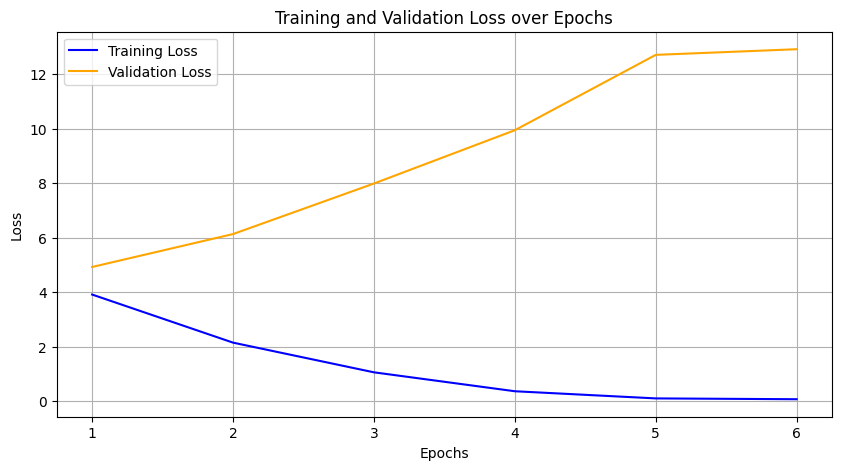

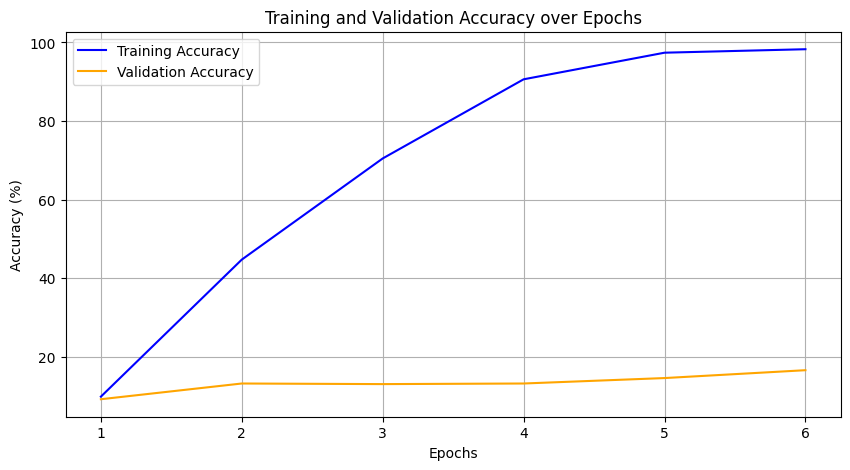

In [19]:
cnn_scheduler = torch.optim.lr_scheduler.StepLR(cnn_optimizer, step_size=10, gamma=0.1)
train_model(cnn_model, cnn_optimizer, criterion, train_dataloader, val_dataloader,cnn_scheduler, num_epochs=10,model_type='cnn')


Epoch [1/10], Train Loss: 6.0402, Train Accuracy: 2.83%, Val Loss: 4.3618, Val Accuracy: 1.69%, Learning Rate: [0.00096]
Epoch [2/10], Train Loss: 4.1894, Train Accuracy: 5.00%, Val Loss: 4.3983, Val Accuracy: 2.31%, Learning Rate: [0.0009216]
Epoch [3/10], Train Loss: 3.8638, Train Accuracy: 8.29%, Val Loss: 4.6412, Val Accuracy: 4.00%, Learning Rate: [0.0008847359999999999]
Epoch [4/10], Train Loss: 3.5804, Train Accuracy: 10.83%, Val Loss: 5.2260, Val Accuracy: 4.31%, Learning Rate: [0.0008493465599999999]
Epoch [5/10], Train Loss: 3.4332, Train Accuracy: 13.46%, Val Loss: 5.3687, Val Accuracy: 5.54%, Learning Rate: [0.0008153726975999999]
Epoch [6/10], Train Loss: 3.2904, Train Accuracy: 14.60%, Val Loss: 5.5669, Val Accuracy: 6.62%, Learning Rate: [0.0007827577896959998]
Early stopping triggered!


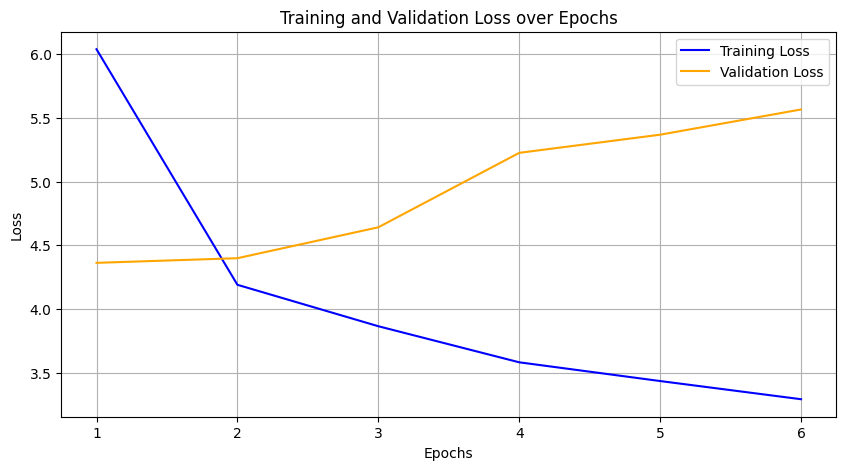

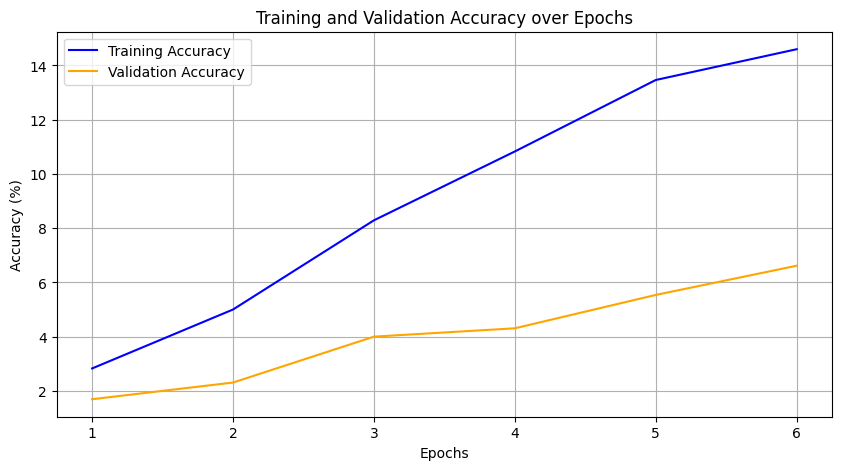

In [20]:
dnn_scheduler = optim.lr_scheduler.ExponentialLR(dnn_optimizer, gamma=0.96)
train_model(dnn_model, dnn_optimizer, criterion, train_dataloader, val_dataloader, dnn_scheduler,num_epochs=10,model_type='dnn')

Epoch [1/10], Train Loss: 4.1731, Train Accuracy: 4.37%, Val Loss: 4.2424, Val Accuracy: 1.85%, Learning Rate: [0.0009779754323328191]
Epoch [2/10], Train Loss: 3.8888, Train Accuracy: 8.54%, Val Loss: 4.2646, Val Accuracy: 3.54%, Learning Rate: [0.0009140576474687263]
Epoch [3/10], Train Loss: 3.7325, Train Accuracy: 10.68%, Val Loss: 4.3138, Val Accuracy: 4.00%, Learning Rate: [0.000814503363531613]
Epoch [4/10], Train Loss: 3.6228, Train Accuracy: 11.91%, Val Loss: 4.3260, Val Accuracy: 4.77%, Learning Rate: [0.0006890576474687264]
Epoch [5/10], Train Loss: 3.5256, Train Accuracy: 13.54%, Val Loss: 4.3399, Val Accuracy: 4.00%, Learning Rate: [0.00055]
Epoch [6/10], Train Loss: 3.4522, Train Accuracy: 15.68%, Val Loss: 4.3496, Val Accuracy: 3.69%, Learning Rate: [0.00041094235253127373]
Early stopping triggered!


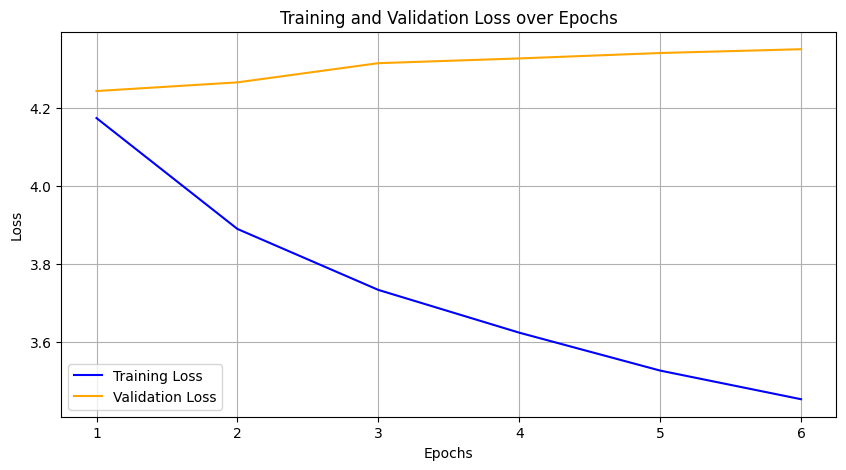

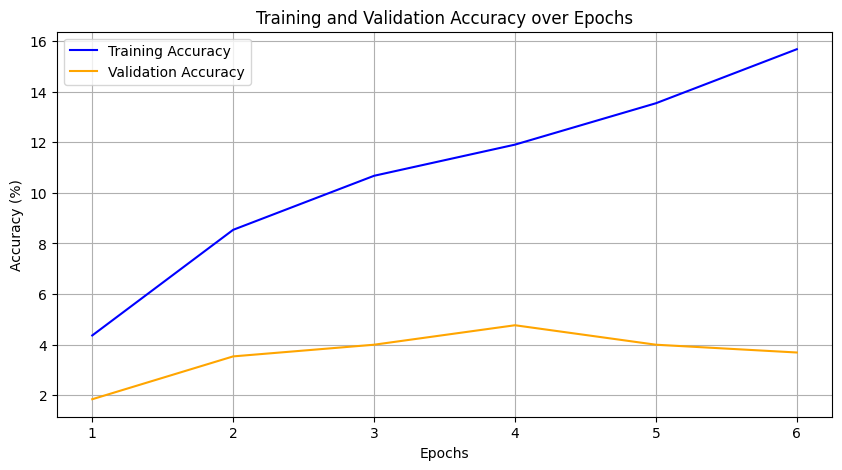

In [21]:
rnn_scheduler = optim.lr_scheduler.CosineAnnealingLR(rnn_optimizer, T_max=10, eta_min=0.0001)
train_model(rnn_model, rnn_optimizer, criterion, train_dataloader, val_dataloader,rnn_scheduler, num_epochs=10,model_type='rnn')

(e) Evaluate models with suitable metrics and explain the results. 

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

def evaluate_model(model, dataloader, model_type='cnn'):
     # Set the model to evaluation mode
    model.eval() 
    all_preds = []
    all_labels = [] 

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)

            if model_type == 'cnn':
                outputs = model(images) 
            elif model_type == 'rnn' or model_type == 'dnn':
                batch_size, channels, height, width = images.size()
                if model_type == 'rnn':
                    batch_size, channels, height, width = images.size()
                    sequence_length = 1  
                    input_size = height * width * channels  
                    images = images.view(batch_size, sequence_length, input_size)
                else:
                    # For DNN, just flatten the input
                    input_size = channels * height * width
                    images = images.view(batch_size, -1)
                outputs = model(images)  

            _, preds = torch.max(outputs, 1) 
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    all_preds = torch.tensor(all_preds)
    all_labels = torch.tensor(all_labels)
    
    # Calculate metrics
    accuracy = (all_preds == all_labels).float().mean().item()
    return accuracy 

In [23]:
accuracy = evaluate_model(cnn_model, test_dataloader,model_type='cnn')
print(f'CNN Accuracy: {accuracy:.4f}')

CNN Accuracy: 0.1123


**Explaination: 
Although still far from perfect, the CNN outperforms both the DNN and RNN, which is expected for an image classification task. This indicates that the CNN is able to learn some useful features from the images but might need further tuning or training to improve its performance.**

In [24]:
accuracy =evaluate_model(dnn_model, test_dataloader,model_type='dnn')
print(f'DNN Accuracy: {accuracy:.4f}')

DNN Accuracy: 0.0169


**Explaination:
This low performance is expected because DNNs don't capture the spatial features in images like CNNs do. When the image is flattened into a 1D vector, valuable information about neighboring pixels is lost, making it much harder for the model to differentiate between classes.**

In [25]:
accuracy = evaluate_model(rnn_model, test_dataloader,model_type='rnn')
print(f'RNN Accuracy: {accuracy:.4f}')

RNN Accuracy: 0.0231


**Explaination:
RNNs are not well-suited for image classification tasks. Treating image pixels or rows as a sequence doesn't capture the essential relationships between neighboring pixels in the 2D space. RNNs work on sequences, but images are better handled by CNNs because of the spatial nature of image data.**


3. For the ‘best-performing model’, you are required to repeat modeling experiments at least 5 times with different random trials of data sampling. Statistical metrics (e.g., mean, standard deviation, 95% Confidence Interval, etc.) across multiple trials are required to provide evidence on the model’s robustness and reproducibility. 

**best-performing model --CNN**

In [26]:
from sklearn.metrics import accuracy_score
from scipy import stats

def evaluate_cnn_multiple_experiments(model, dataloader, num_trials=5):
    all_accuracies = []

    for trial in range(num_trials):
        torch.manual_seed(trial)
        np.random.seed(trial)
        
        # Train and evaluate the model
        print(f"\nExperiment {trial+1}/{num_trials}")
        accuracy = evaluate_model(model, dataloader)
        all_accuracies.append(accuracy)
        print(f"Trial {trial+1} Accuracy: {accuracy}")

    # Calculate statistics
    mean_accuracy = np.mean(all_accuracies)
    std_accuracy = np.std(all_accuracies)
    conf_interval = stats.t.interval(0.95, len(all_accuracies)-1, loc=mean_accuracy, scale=std_accuracy/np.sqrt(len(all_accuracies)))

    print(f"\nMean Accuracy: {mean_accuracy:.4f}")
    print(f"Standard Deviation: {std_accuracy:.4f}")
    print(f"95% Confidence Interval: {conf_interval}")

    # Visualize the results (optional)
    plt.boxplot(all_accuracies)
    plt.title(f"Accuracy across {num_trials} Experiments")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.show()





Experiment 1/5
Trial 1 Accuracy: 0.11230769008398056

Experiment 2/5
Trial 2 Accuracy: 0.11230769008398056

Experiment 3/5
Trial 3 Accuracy: 0.11230769008398056

Experiment 4/5
Trial 4 Accuracy: 0.11230769008398056

Experiment 5/5
Trial 5 Accuracy: 0.11230769008398056

Mean Accuracy: 0.1123
Standard Deviation: 0.0000
95% Confidence Interval: (nan, nan)


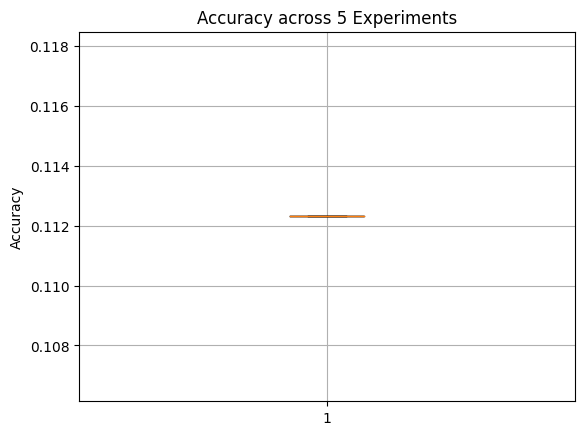

In [27]:
evaluate_cnn_multiple_experiments(cnn_model, test_dataloader, num_trials=5)

In [28]:
torch.save(cnn_model.state_dict(), 'model.pth')